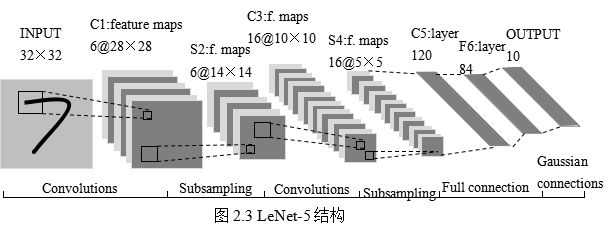

# 定义网络模型

In [20]:
# 使用torch.nn包来构建神经网络.
import torch
from torch import nn
import torch.nn.functional as F

class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, padding=2)  # padding = 2, 28+2+2=32
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.pool = nn.MaxPool2d(2)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(400, 120)  # 400=16*5*5
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.softmax = nn.Softmax()
 
    def forward(self, x):
        x = self.relu(self.pool(self.conv1(x)))
        x = self.relu(self.pool(self.conv2(x)))
        x = x.view(-1, 400)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        x = self.softmax(x)
        return x

model = LeNet5()
model

LeNet5(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (relu): ReLU()
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
  (softmax): Softmax(dim=None)
)

In [22]:
#测试一下
x = torch.rand([1,1,28,28])
model(x)

D:\ANnaconda\envs\HBHB\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


tensor([[0.0914, 0.1005, 0.0906, 0.0938, 0.1086, 0.1133, 0.0976, 0.1100, 0.1020,
         0.0922]], grad_fn=<SoftmaxBackward0>)

# 数据集准备

In [27]:
import torchvision
from torchvision import datasets,transforms
from torch.utils import data
"""MNIST数据集"""
train_dataset = datasets.MNIST(root='../data',download=True,train=True,transform=torchvision.transforms.ToTensor())
test_dataset = datasets.MNIST(root='../data',download=True,train=False,transform=torchvision.transforms.ToTensor())

# DataLoader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,batch_size=128,shuffle=True)
 
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,batch_size=100,shuffle=False)

#  训练函数

In [28]:
# 损失函数：交叉熵损失
loss_func = torch.nn.CrossEntropyLoss()
 
# 定义优化器
opt = torch.optim.Adam(model.parameters(), lr=0.001)

def train(epoch):
    model.train()
    for batch_index, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        opt.zero_grad()                   # backward前梯度清零
        output = model(data)
        loss = loss_func(output, target)
        # 误差反向传播
        loss.backward()
        # 参数更新
        opt.step()
        if batch_index % 20 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_index * len(data), len(train_loader.dataset),100. * batch_index / len(train_loader), loss.item()))

def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        # 叠加loss
        test_loss += loss_func(output, target).item()
        # 最大概率预测结果标签
        pred = torch.max(output.data, 1)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()
        test_loss /= len(test_loader.dataset)
 
        print('Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)'.format(
            test_loss,correct, len(test_loader.dataset),100. * correct / len(test_loader.dataset)))

# 迭代10轮后测试
for epoch in range(1, 11):
    train(epoch)

test()

D:\ANnaconda\envs\HBHB\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.302255
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.280798
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.027888
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.884401
Train Epoch: 1 [10240/60000 (17%)]	Loss: 1.895296
Train Epoch: 1 [12800/60000 (21%)]	Loss: 1.812582
Train Epoch: 1 [15360/60000 (26%)]	Loss: 1.835766
Train Epoch: 1 [17920/60000 (30%)]	Loss: 1.788834
Train Epoch: 1 [20480/60000 (34%)]	Loss: 1.751018
Train Epoch: 1 [23040/60000 (38%)]	Loss: 1.873360
Train Epoch: 1 [25600/60000 (43%)]	Loss: 1.835454
Train Epoch: 1 [28160/60000 (47%)]	Loss: 1.875965
Train Epoch: 1 [30720/60000 (51%)]	Loss: 1.762903
Train Epoch: 1 [33280/60000 (55%)]	Loss: 1.721209
Train Epoch: 1 [35840/60000 (60%)]	Loss: 1.752681
Train Epoch: 1 [38400/60000 (64%)]	Loss: 1.657184
Train Epoch: 1 [40960/60000 (68%)]	Loss: 1.624984
Train Epoch: 1 [43520/60000 (72%)]	Loss: 1.718184
Train Epoch: 1 [46080/60000 (77%)]	Loss: 1.654629
Train Epoch: 1 [48640/60000 (81%)]	Loss: 1.622990
Train Epoc

Train Epoch: 7 [56320/60000 (94%)]	Loss: 1.461592
Train Epoch: 7 [58880/60000 (98%)]	Loss: 1.483795
Train Epoch: 8 [0/60000 (0%)]	Loss: 1.463944
Train Epoch: 8 [2560/60000 (4%)]	Loss: 1.477433
Train Epoch: 8 [5120/60000 (9%)]	Loss: 1.491796
Train Epoch: 8 [7680/60000 (13%)]	Loss: 1.464122
Train Epoch: 8 [10240/60000 (17%)]	Loss: 1.480370
Train Epoch: 8 [12800/60000 (21%)]	Loss: 1.474234
Train Epoch: 8 [15360/60000 (26%)]	Loss: 1.469639
Train Epoch: 8 [17920/60000 (30%)]	Loss: 1.492874
Train Epoch: 8 [20480/60000 (34%)]	Loss: 1.502293
Train Epoch: 8 [23040/60000 (38%)]	Loss: 1.477483
Train Epoch: 8 [25600/60000 (43%)]	Loss: 1.486938
Train Epoch: 8 [28160/60000 (47%)]	Loss: 1.469194
Train Epoch: 8 [30720/60000 (51%)]	Loss: 1.474172
Train Epoch: 8 [33280/60000 (55%)]	Loss: 1.461703
Train Epoch: 8 [35840/60000 (60%)]	Loss: 1.478284
Train Epoch: 8 [38400/60000 (64%)]	Loss: 1.469787
Train Epoch: 8 [40960/60000 (68%)]	Loss: 1.494210
Train Epoch: 8 [43520/60000 (72%)]	Loss: 1.479204
Train Epoc

D:\ANnaconda\envs\HBHB\lib\site-packages\ipykernel_launcher.py:28: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.


Test set: Average loss: 0.0001, Accuracy: 99/10000 (1%)
Test set: Average loss: 0.0001, Accuracy: 199/10000 (2%)
Test set: Average loss: 0.0001, Accuracy: 297/10000 (3%)
Test set: Average loss: 0.0001, Accuracy: 394/10000 (4%)
Test set: Average loss: 0.0001, Accuracy: 492/10000 (5%)
Test set: Average loss: 0.0001, Accuracy: 590/10000 (6%)
Test set: Average loss: 0.0002, Accuracy: 685/10000 (7%)
Test set: Average loss: 0.0001, Accuracy: 784/10000 (8%)
Test set: Average loss: 0.0001, Accuracy: 884/10000 (9%)
Test set: Average loss: 0.0001, Accuracy: 983/10000 (10%)
Test set: Average loss: 0.0001, Accuracy: 1081/10000 (11%)
Test set: Average loss: 0.0001, Accuracy: 1179/10000 (12%)
Test set: Average loss: 0.0002, Accuracy: 1274/10000 (13%)
Test set: Average loss: 0.0001, Accuracy: 1371/10000 (14%)
Test set: Average loss: 0.0001, Accuracy: 1470/10000 (15%)
Test set: Average loss: 0.0002, Accuracy: 1564/10000 (16%)
Test set: Average loss: 0.0001, Accuracy: 1664/10000 (17%)
Test set: Average

In [29]:
#保存网络参数
save_path = './Lenet_Minist.pth'   
torch.save(model.state_dict(), save_path)